# Classification: Data Exploration

In [7]:
import acquire
import prepare

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = acquire.get_titanic_data()
df = prepare.handle_missing_values(df)

In [9]:
df = df.assign(embark_town = df.embark_town.fillna('Other'))
df = df.assign(embarked = df.embarked.fillna('O'))
df = df.drop(columns=['deck'])

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df.embarked)
df = df.assign(embarked_encode = encoder.transform(df.embarked))

In [11]:
### Drop na values

df = df.dropna()

In [32]:
### Test / Train Split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=.30, random_state=123, stratify=df[['survived']])
print(train.columns)
print(train.shape)
print(test.shape)

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')
(499, 13)
(215, 13)


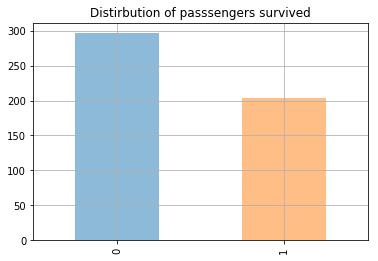

In [14]:
### Feature interactions & correlations

train.survived.value_counts().plot(kind='bar', alpha=.5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

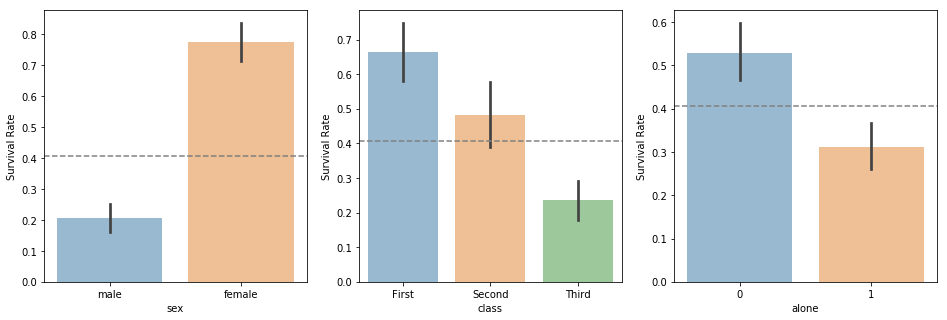

In [20]:
### Barplots with probabilities

features = ['sex', 'class', 'alone']

# '_' returns us a list of two things, but we only care about the axis
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

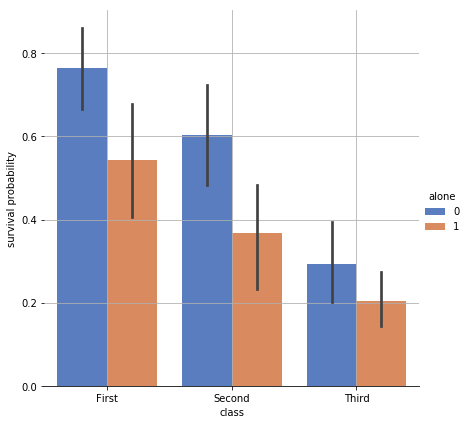

In [36]:
# Draw a nested barplot to show survival for alone and sex
g = sns.catplot(x="class", y="survived", hue="alone", data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
plt.grid(b = True , which = "major")

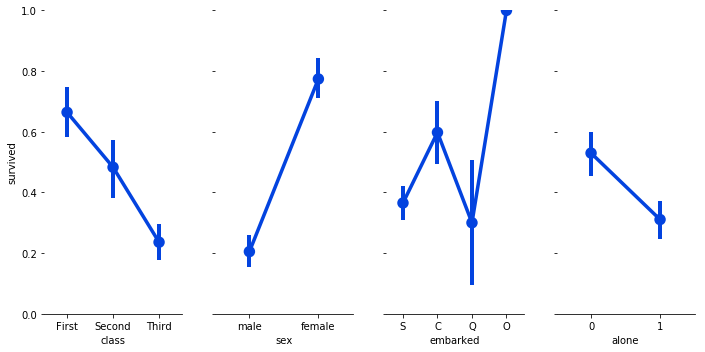

In [37]:
# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(train, y_vars="survived",
                 x_vars=["class", "sex", "embarked", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:blue")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

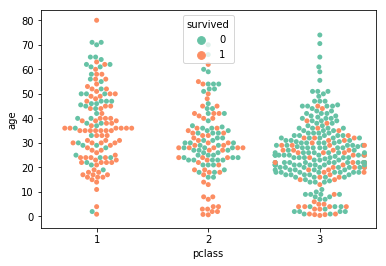

In [46]:
sns.swarmplot(x="pclass", y="age", data=train, hue="survived", palette="Set2")